<h1>Árboles de decisión</h1>



<p><strong>Objetivo: </strong> El objetivo de este cuaderno es familiarizarse con la técnica supervisada de árboles de decisión a través del entrenamiento, evaluación y uso para predicción de un árbol.  </p>

##Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
   <li>Cargar librerías</li>
  <li>Cargar los Datos</li>
  <li>Explorar los Datos</li>
  <li>Preparar los datos</li>
  <li>División del conjunto de datos en entrenamiento y pruebas </li>
  <li>Entrenamiento y prueba del Arbol de Decision </li>
  <li>Calcular métricas de desempeño </li>
  <li>Visualizar el árbol</li>
  <li>Aplicar pre-poda</li>
  <li>Optimizar hiper parámetros</li>
</ul>


</div>
<hr>

##<p><strong>Paso : Cargar librerías </strong><br>
  En primer lugar cargaremos las librerías que serán de utilidad para manipular los datos y para crear el árbol

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # Para graficar
from sklearn import tree # Importa el módulo tree https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier # Importa el Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importa la función para dividir el conjunto de datos en train_test_split 
from sklearn import metrics #Importa metricas scikit-learn para el calculo del accuracy
from sklearn import preprocessing #Importa funciones para el procesamiento de los datos
from sklearn.metrics import confusion_matrix #Importa los métodos de cálculo de la matriz de confusión
from sklearn.metrics import precision_recall_fscore_support # Importa módulos para calcular métricas a partir de la matriz de confusión

<p><strong>Paso: Cargar los datos </strong></br>
A continuación cargaremos los datos que serán usados para entrenar y evaluar el modelo de árbol. La ruta de los datos puede variar.  Si el archivo está en una dirección pública en internet podrá usar la opción a continuación.

In [ ]:
# Lectura desde una url. Atención desde dropbox debe usar =1 y No =0 que es el valor por defecto de los enlaces de dropbox
path = "https://www.dropbox.com/s/jgbeqb35ob76mpx/AdventureWorks.csv?dl=1"

#Lectura del archivo csv
df1 = pd.read_csv(path, sep=";", encoding = "utf-8", decimal=',')

In [ ]:
type(df1)

pandas.core.frame.DataFrame

##<p><strong>Paso: Explorar los datos </strong></br>
Este paso es fundamental para ver los atributos que tenemos disponibles y las características de cada uno de los atributos. Así mismo, se debe revisar el tamaño de los datos y el estado de calidad para identificar posibles acciones de preparación.

In [ ]:
print("Forma del conjunto de datos: \n", df1.shape)
print("La descripción: \n", df1.describe(include="all"))
print("Los tipos de datos: \n", df1.dtypes)
print("Los 5 primeros registros: \n", df1.head())
print("Los 5 últimos registros: \n", df1.tail())

Forma del conjunto de datos: 
 (18484, 15)
La descripción: 
             FechaNacimiento EstadoCivil   Sexo  IngresosAnuales    TotalHijos  \
count                 18484       18484  18484     18484.000000  18484.000000   
unique                 8252           2      2              NaN           NaN   
top     1967-05-14 00:00:00           M      M              NaN           NaN   
freq                     12       10011   9351              NaN           NaN   
mean                    NaN         NaN    NaN     57305.777970      1.844352   
std                     NaN         NaN    NaN     32285.841703      1.612408   
min                     NaN         NaN    NaN     10000.000000      0.000000   
25%                     NaN         NaN    NaN     30000.000000      0.000000   
50%                     NaN         NaN    NaN     60000.000000      2.000000   
75%                     NaN         NaN    NaN     70000.000000      3.000000   
max                     NaN         NaN    NaN  

In [ ]:
df1.replace(',','.', regex=True, inplace=True)

In [ ]:
#Revisaremos los valores que toma cada atributo para posteriormente generar el atributo numérico a partir de sus valores pues la técnica de árboles implementada en python sólo permite numéricos
df1 = df1.rename(columns={'DistanciaaTrabajo': 'DistanciaTrabajo'})
print("Los valores de distancia a trabajo \n",df1["DistanciaTrabajo"].value_counts())
print("Los valores de educación \n",df1["Educacion"].value_counts())
print("Los valores de ocupacion \n",df1["Ocupacion"].value_counts())
print("Los valores de sexo \n",df1["Sexo"].value_counts())

Los valores de distancia a trabajo 
 0-1 Miles     6310
2-5 Miles     3234
1-2 Miles     3232
5-10 Miles    3214
10+ Miles     2494
Name: DistanciaTrabajo, dtype: int64
Los valores de educación 
 Licenciatura                          5356
Estudios universitarios (en curso)    5064
Educación secundaria                  3294
Estudios de postgrado                 3189
Educación secundaria (en curso)       1581
Name: Educacion, dtype: int64
Los valores de ocupacion 
 Profesional             5520
Obrero especializado    4577
Gestión                 3075
Administrativo          2928
Obrero                  2384
Name: Ocupacion, dtype: int64
Los valores de sexo 
 M    9351
F    9133
Name: Sexo, dtype: int64


In [ ]:
df1['Ocupacion'] = df1['Ocupacion'].replace(['Obrero especializado'],'ObreroEspecializado')
df1['Educacion'] = df1['Educacion'].replace(['Educación secundaria'],'EducaciónSecundaria')

In [ ]:
# Exploraremos si los datos están balanceados con respecto a la clase
df1.groupby('CompradorBicleta').size()

CompradorBicleta
0.0    9352
1.0    9132
dtype: int64

##<p><strong>Paso: Preparar lo datos</strong></br>
La preparación de datos incluye la limpieza y la generación de la vista minable. Esta última depende de la técnica que se va a aplicar.

In [ ]:
#Dividiremos el conjunto de datos en característicias (features) y la variable objetivo (target)
feature_cols = ['EstadoCivil', 'Sexo', 'IngresosAnuales', 'TotalHijos','Educacion','TieneCasa','NumeroCarros','Edad','DistanciaTrabajo', 'Ocupacion']
X = df1[feature_cols] # Features o Características que corresponde a las variables predictoras
y = df1.CompradorBicleta # Target o variable objetivo

In [ ]:
le_EC = preprocessing.LabelEncoder()
le_EC.fit([ 'M', 'S'])
X.EstadoCivil = le_EC.transform(X.EstadoCivil)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X.Sexo= le_sex.transform(X.Sexo)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
le_DT = preprocessing.LabelEncoder()
le_DT.fit(['0-1 Miles', '1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles'])
X.DistanciaTrabajo= le_DT.transform(X.DistanciaTrabajo)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
le_Edu = preprocessing.LabelEncoder()
le_Edu.fit(['Educación secundaria (en curso)', 'EducaciónSecundaria', 'Estudios universitarios (en curso)','Licenciatura','Estudios de postgrado'])
X.Educacion = le_Edu.transform(X.Educacion)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
le_Ocu = pd.get_dummies(df1.Ocupacion, prefix='Ocu')
X = pd.concat([X.drop(['Ocupacion'],axis=1), le_Ocu],axis=1)


In [ ]:
# Se deben actualizar los features pues agregamos nuevas columnas
feature_cols = list(X.columns)
X

,EstadoCivil,Sexo,IngresosAnuales,TotalHijos,Educacion,TieneCasa,NumeroCarros,Edad,DistanciaTrabajo,Ocu_Administrativo,Ocu_Gestión,Ocu_Obrero,Ocu_ObreroEspecializado,Ocu_Profesional
0,0,1,90000.0,2.0,4,1.0,0.0,49.0,1,0,0,0,0,1
1,1,1,60000.0,3.0,4,0.0,1.0,49.0,0,0,0,0,0,1
2,0,1,60000.0,3.0,4,1.0,1.0,49.0,3,0,0,0,0,1
3,1,0,70000.0,0.0,4,0.0,1.0,47.0,4,0,0,0,0,1
4,1,0,80000.0,5.0,4,1.0,4.0,46.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,0,1,30000.0,1.0,2,1.0,0.0,56.0,0,1,0,0,0,0
18480,1,0,30000.0,3.0,2,1.0,0.0,54.0,0,1,0,0,0,0
18481,1,1,30000.0,3.0,2,0.0,0.0,55.0,0,1,0,0,0,0
18482,0,1,30000.0,3.0,4,1.0,0.0,56.0,0,1,0,0,0,0


In [ ]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
18479    1.0
18480    1.0
18481    1.0
18482    1.0
18483    1.0
Name: CompradorBicleta, Length: 18484, dtype: float64

##<p><strong>Paso: División del conjunto de datos en entrenamiento y pruebas </strong></br>
Para poder identificar la mejor parametrización de los algoritmos se usan diferentes estrategias. Una de ellas se llama Hold-Out y consiste en dejar un porcentaje para entrenar y otra para probar. Normalmente 70% para entrenar y 30% para probar.

In [ ]:
# Dividir el conjunto de datos conjunto de entrenamiento y en conjunto de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

##<p><strong>Paso: Entrenamiento y prueba del Arbol de Decision</strong></br>
Se entrenará el árbol de decisión con el conjunto de entrenamiento (X_train y Y_train) y luego haremos la predicción al conjunto de prueba (X_test)

In [ ]:
#Crear el Árbol de decisión (Objeto Vacío)
clf = DecisionTreeClassifier(random_state=5, max_depth=3)

# Entrenar el árbol de decisión
clf = clf.fit(X_train,y_train)

#Predecir la variable objetivo en los datos de prueba (probar el modelo)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0., 0., 1., ..., 1., 0., 0.])

##<p><strong>Paso: Calcular las métricas de desempeño a partir de los resultados de la prueba </strong></br>
Con los resultados obtenidos al predecir la variable objetivo en los datos de prueba se calcula qué tan bien o mal hizo la predección el modelo. La medición de errores y aciertos es usado para obener varias métricas.

In [ ]:
# Accuracy, permite identificar qué tan confiable es el modelo. Qué tantas predicciones correctas realizó? Se compara el valor original en y_test con el valor predicho en y_pred
print("Matriz de confusión: \n", confusion_matrix(y_test, y_pred))

print("Matriz de confusión normalizada: \n", confusion_matrix(y_test, y_pred, normalize="true"))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN,FP,FN,TP \n", (tn, fp, fn, tp))


Matriz de confusión: 
 [[1473 1348]
 [ 738 1987]]
Matriz de confusión normalizada: 
 [[0.52215526 0.47784474]
 [0.27082569 0.72917431]]
TN,FP,FN,TP 
 (1473, 1348, 738, 1987)


In [ ]:
# Ahora calcularemos las métricas derivadas de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.52      0.59      2821
         1.0       0.60      0.73      0.66      2725

    accuracy                           0.62      5546
   macro avg       0.63      0.63      0.62      5546
weighted avg       0.63      0.62      0.62      5546



##<p><strong>Ahora tú </strong></br>
Crea un nuevo arbol llamado miClf con parámetros criterion entropy y con min_samples_split 5

In [ ]:
#Escribe acá tu código
miClf = DecisionTreeClassifier(random_state=5, max_depth=8, criterion='entropy', min_samples_split=5)

# Entrenar el árbol de decisión
miClf = miClf.fit(X_train,y_train)

#Predecir la variable objetivo en los datos de prueba (probar el modelo)
y_pred = miClf.predict(X_test)




Haz doble clic  __aquí__ para ver la solución.

<!-- Tu respuesta está a continuación:

#Crear el Árbol de decisión (Objeto Vacío)
miClf = DecisionTreeClassifier(random_state=5, criterion = "entropy", min_samples_split=5, max_depth=8)

# Entrenar el árbol de decisión
miClf = miClf.fit(X_train,y_train)

#Predecir la variable objetivo en los datos de prueba (probar el modelo)
y_pred = miClf.predict(X_test)

-->





##<p><strong>Ahora tú </strong></br>
Evalúa las métricas de accuracy, precision y recall del árbol generado miClf

In [ ]:
# Escribe tu código
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.71      2821
         1.0       0.70      0.79      0.74      2725

    accuracy                           0.73      5546
   macro avg       0.73      0.73      0.73      5546
weighted avg       0.73      0.73      0.73      5546



Haz doble clic  __aquí__ para ver la solución.

<!-- Tu respuesta está a continuación:

print(classification_report(y_test, y_pred))
-->





##<p><strong>Paso: Visualización </strong></br>
 Visualizaremos el árbol de decisión

In [ ]:

#Primero visualizaremos el número de nodos
n_nodes = clf.tree_.node_count
print("El árbol construido tiene ", n_nodes, "nodos ")
#Ahora visualizaremos el árbol en modo texto
arbol = tree.export_text(clf, feature_names=feature_cols, show_weights=True)
print(arbol)


El árbol construido tiene  15 nodos 
|--- NumeroCarros <= 1.50
|   |--- Edad <= 62.50
|   |   |--- DistanciaTrabajo <= 3.50
|   |   |   |--- weights: [1912.00, 3346.00] class: 1.0
|   |   |--- DistanciaTrabajo >  3.50
|   |   |   |--- weights: [319.00, 214.00] class: 0.0
|   |--- Edad >  62.50
|   |   |--- Edad <= 76.50
|   |   |   |--- weights: [247.00, 187.00] class: 0.0
|   |   |--- Edad >  76.50
|   |   |   |--- weights: [104.00, 14.00] class: 0.0
|--- NumeroCarros >  1.50
|   |--- IngresosAnuales <= 65000.00
|   |   |--- Edad <= 74.50
|   |   |   |--- weights: [2035.00, 1102.00] class: 0.0
|   |   |--- Edad >  74.50
|   |   |   |--- weights: [222.00, 23.00] class: 0.0
|   |--- IngresosAnuales >  65000.00
|   |   |--- TotalHijos <= 4.50
|   |   |   |--- weights: [1167.00, 1313.00] class: 1.0
|   |   |--- TotalHijos >  4.50
|   |   |   |--- weights: [525.00, 208.00] class: 0.0



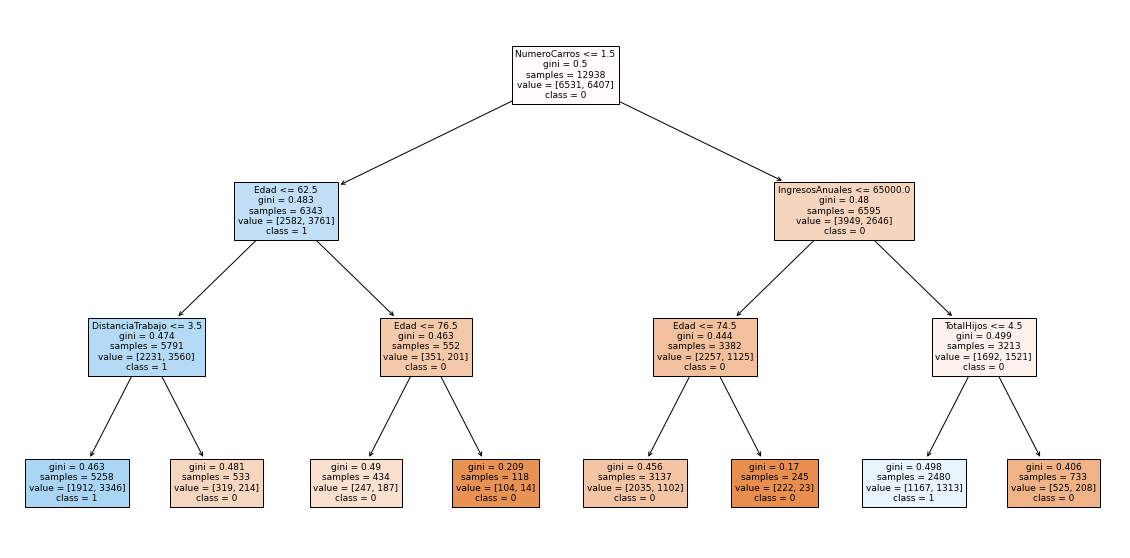

In [ ]:
#Ahora visualizaremos el árbol gráficamente
plt.figure(figsize=(20,10))
tree.plot_tree(clf, 
               feature_names=feature_cols,  
               class_names=['0','1'],
               filled=True)
plt.show()

##<p><strong>Ahora tú </strong></br>
Visualiza tu árbol miClf

In [ ]:
# Escribe tu código


<b>Aquí</b> para ver la solución.

<!-- Respuesta:

#Primero visualizaremos el número de nodos
n_nodes = miClf.tree_.node_count
print("El árbol construido tiene ", n_nodes, "nodos ")
#Ahora visualizaremos el árbol en modo texto
arbol = tree.export_text(miClf, feature_names=feature_cols, show_weights=True)
print(arbol)
-->


In [ ]:
#Ahora visualizaremos el árbol gráficamente


<b>Aquí</b> para ver la solución.

<!-- Respuesta:

```
# Tiene formato de código

```
# Tiene formato de código
```


```

plt.figure(figsize=(20,10))
tree.plot_tree(miClf, 
               feature_names=feature_cols,  
               class_names=['0','1'],
               filled=True)
plt.show()
-->

##<p><strong>Paso: Probando otros parámetros para crear el árbol</strong></br>
Hasta el momento generamos el árbol sin revisar muy bien la parametrización. Si modificamos el criterio de partición y la profundidad máxima permitida se obtendrá un desempeño diferente
Para mayor información de los parámetros consultar <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier" target="_blank">Documentación Decision Tree Clasifier</a>

In [ ]:
# Crear el objeto árbol de decisión
clf = DecisionTreeClassifier(random_state=5, criterion="entropy", class_weight="balanced")

# Entrenar el árbol
clf = clf.fit(X_train,y_train)

# Predecir los valores del conjunto de prueba
y_pred = clf.predict(X_test)


In [ ]:
#Calcularemos nuevamente las medidas de desempeño
# Accuracy, permite identificar qué tan confiable es el modelo. Qué tantas predicciones correctas realizó? Se compara el valor original en y_test con el valor predicho en y_pred
print("Matriz de confusión: \n", confusion_matrix(y_test, y_pred))
print("Matriz de confusión normalizada: \n", confusion_matrix(y_test, y_pred, normalize="true"))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN,FP,FN,TP \n", (tn, fp, fn, tp))

# Ahora calcularemos las métricas derivadas de la matriz de confusión
print(classification_report(y_test, y_pred))

Matriz de confusión: 
 [[2065  756]
 [ 489 2236]]
Matriz de confusión normalizada: 
 [[0.73200993 0.26799007]
 [0.17944954 0.82055046]]
TN,FP,FN,TP 
 (2065, 756, 489, 2236)
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      2821
         1.0       0.75      0.82      0.78      2725

    accuracy                           0.78      5546
   macro avg       0.78      0.78      0.78      5546
weighted avg       0.78      0.78      0.78      5546



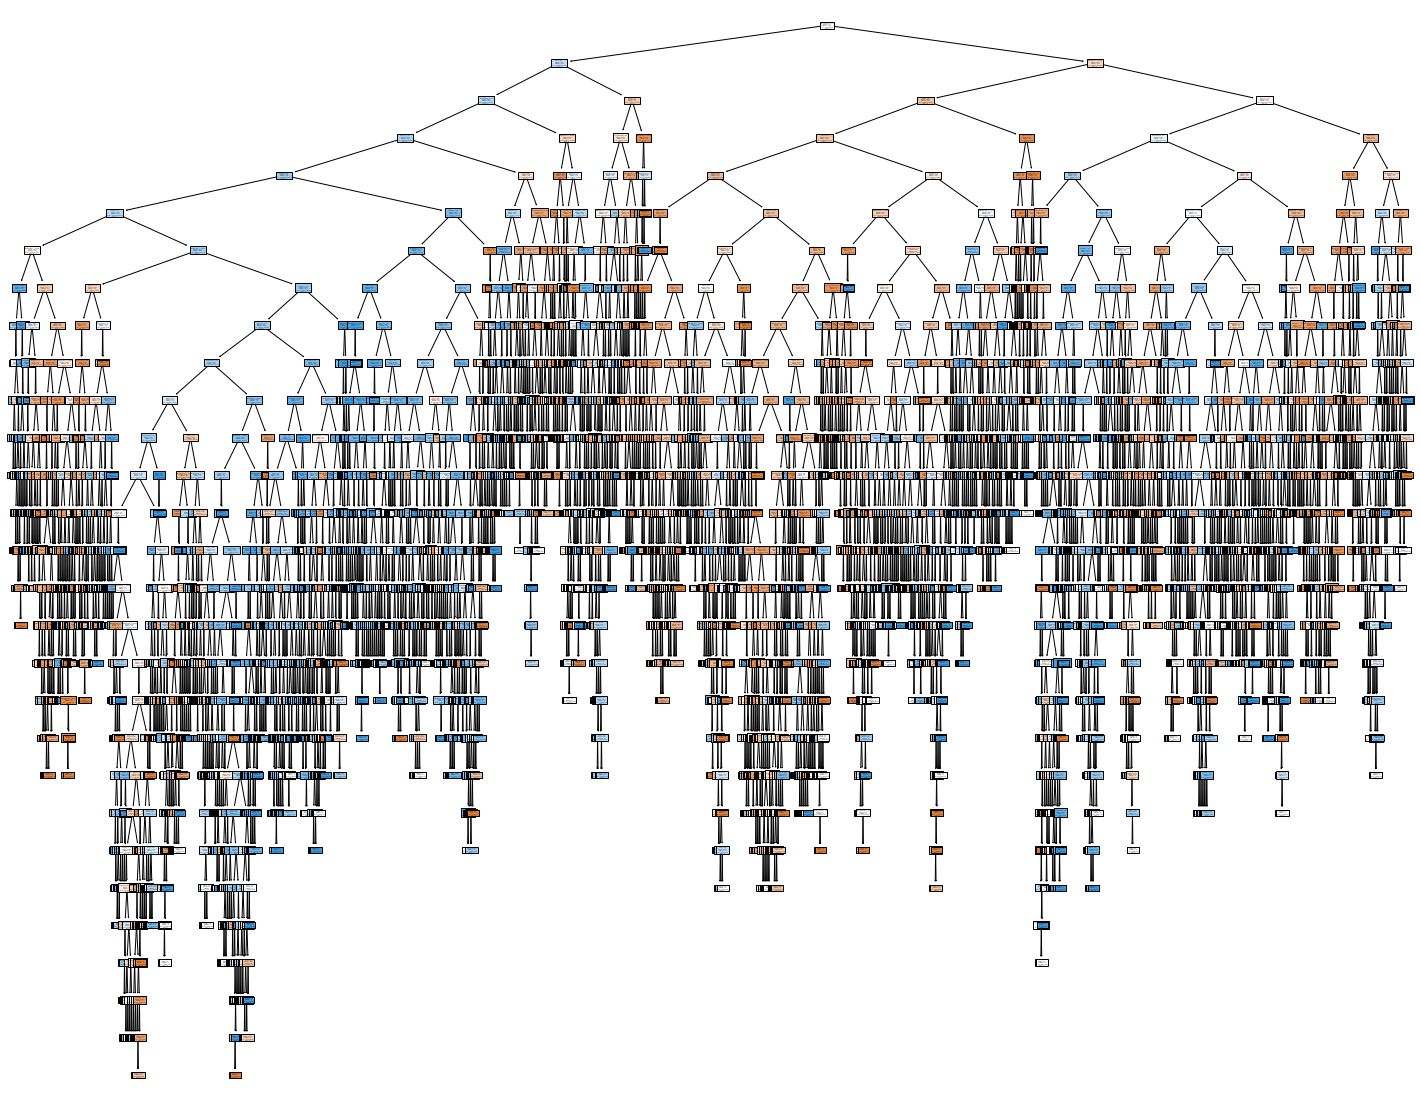

In [ ]:
#Ahora visualizaremos el árbol gráficamente
plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
               feature_names=feature_cols,  
               class_names=['0','1'],
               filled=True)
plt.show()

##<p><strong>Paso: Podar para evitar sobreajuste o sobre alimentación </strong></br>
Las métricas de desempeño parecían interesantes. Sin embargo, al observar el árbol podemos identificar un claro sobre ajuste pues tenemos muchos niveles y, considerando que el número de atributos es pequeño, es un fuerte indicio de estar generando prácticamente una regla por cada registro (ejemplo). Es necesario aplicar diferentes mecanismos para evitar el sobre ajuste. El más relevante es la poda.

In [ ]:
# Crear el objeto árbol de decisión
clf = DecisionTreeClassifier(random_state=5, criterion="entropy", class_weight="balanced", min_samples_leaf=20, max_depth=7)

# Entrenar el árbol
clf = clf.fit(X_train,y_train)

# Predecir los valores del conjunto de prueba
y_pred = clf.predict(X_test)

#Evaluemos el desempeño del nuevo árbol
print("Accuracy: \n", metrics.accuracy_score(y_test, y_pred))


Accuracy: 
 0.7142084385142445


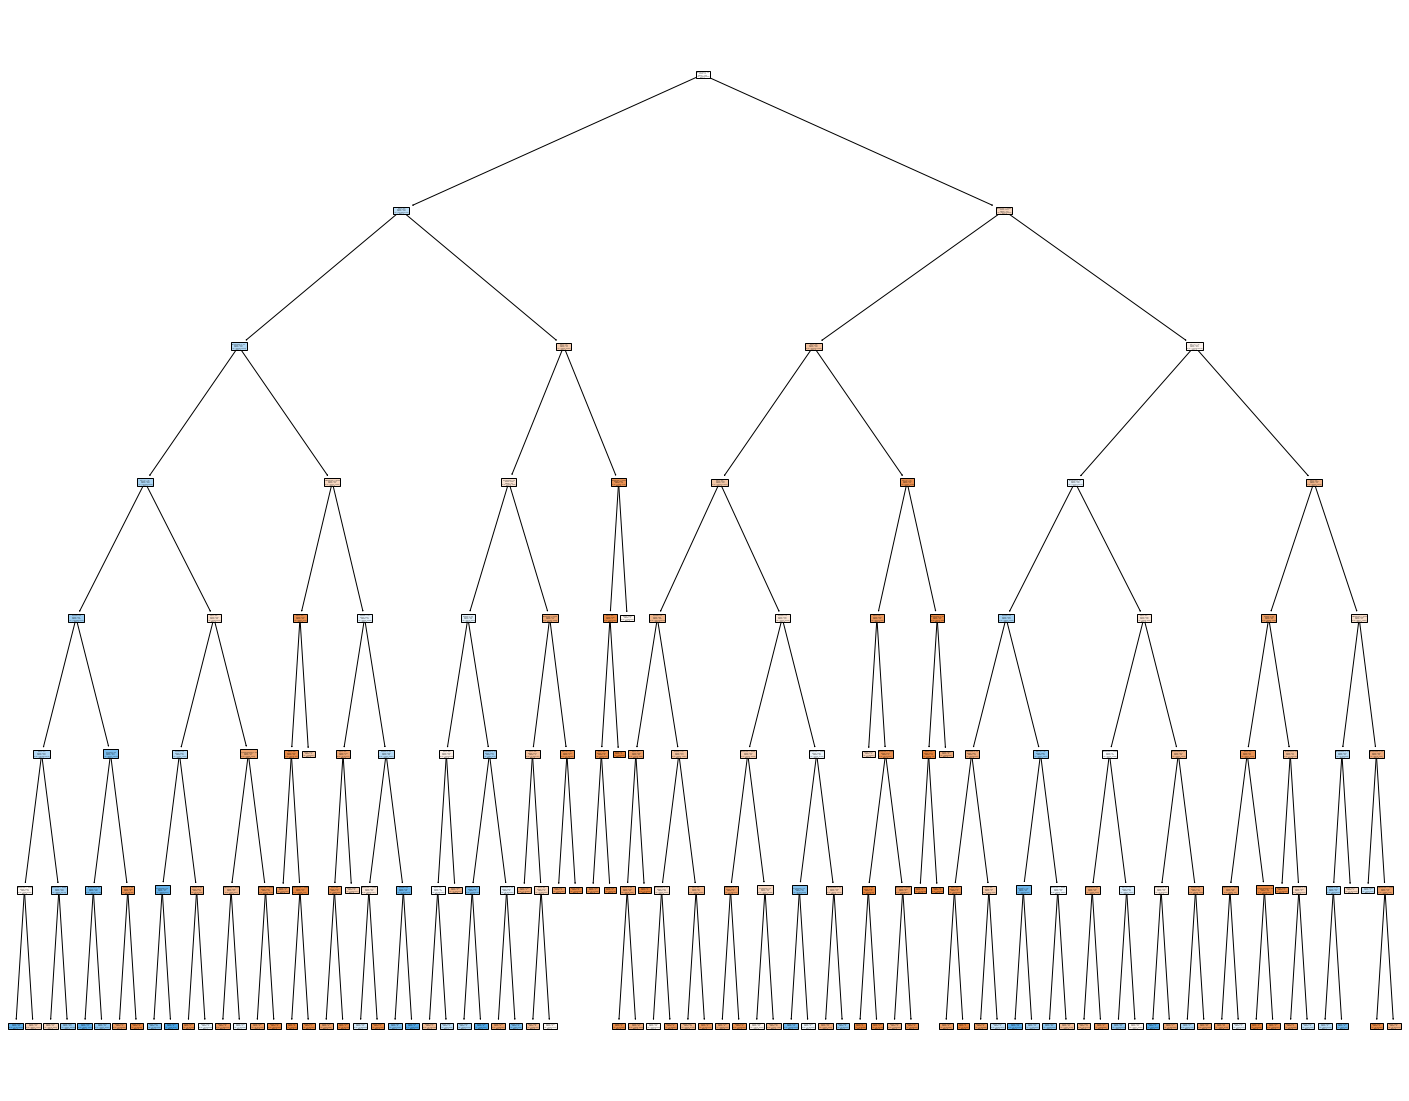

In [ ]:
#Ahora visualizaremos el árbol gráficamente
plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
               feature_names=feature_cols,  
               class_names=['0','1'],
               filled=True)
plt.show()

In [ ]:
#Para poder ver mejor los nodos lo visualizaremos en modo texto
arbol = tree.export_text(clf, feature_names=feature_cols, show_weights=True)
print(arbol)


|--- NumeroCarros <= 1.50
|   |--- Edad <= 62.50
|   |   |--- DistanciaTrabajo <= 3.50
|   |   |   |--- TotalHijos <= 3.50
|   |   |   |   |--- Educacion <= 3.50
|   |   |   |   |   |--- Edad <= 41.50
|   |   |   |   |   |   |--- IngresosAnuales <= 15000.00
|   |   |   |   |   |   |   |--- weights: [21.79, 113.08] class: 1.0
|   |   |   |   |   |   |--- IngresosAnuales >  15000.00
|   |   |   |   |   |   |   |--- weights: [291.21, 179.72] class: 0.0
|   |   |   |   |   |--- Edad >  41.50
|   |   |   |   |   |   |--- IngresosAnuales <= 15000.00
|   |   |   |   |   |   |   |--- weights: [133.72, 87.84] class: 0.0
|   |   |   |   |   |   |--- IngresosAnuales >  15000.00
|   |   |   |   |   |   |   |--- weights: [740.90, 1578.13] class: 1.0
|   |   |   |   |--- Educacion >  3.50
|   |   |   |   |   |--- Ocu_Obrero <= 0.50
|   |   |   |   |   |   |--- NumeroCarros <= 0.50
|   |   |   |   |   |   |   |--- weights: [120.84, 655.28] class: 1.0
|   |   |   |   |   |   |--- NumeroCarros >  0.50


##<p><strong>Ahora tú:</strong><br>
Construye un clasificador llamado MiClasificador y ajusta los hiperparámetros de la siguiente manera el criterion entropy, min_samples_leaf sea 30
Calcula el accuracy de este clasificador, mejoró o empeoró?
  

In [ ]:
#Crear el clasificador
MiClasificador = DecisionTreeClassifier(random_state=5, criterion="entropy", min_samples_leaf=30)

# Entrenar el árbol
MiClasificador = MiClasificador.fit(X_train,y_train)

# Predecir los valores del conjunto de prueba
y_pred = MiClasificador.predict(X_test)

#Evaluemos el desempeño del nuevo árbol
print("Accuracy: \n",metrics.accuracy_score(y_test, y_pred))



Accuracy: 
 0.7486476739992788


Haz doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta:
#Crear el clasificador
MiClasificador = DecisionTreeClassifier(random_state=5, criterion="entropy", min_samples_leaf=30)

# Entrenar el árbol
MiClasificador = MiClasificador.fit(X_train,y_train)

# Predecir los valores del conjunto de prueba
y_pred = MiClasificador.predict(X_test)

#Evaluemos el desempeño del nuevo árbol
print("Accuracy: \n",metrics.accuracy_score(y_test, y_pred))

-->

##<p><strong>Paso: Optimizando los hiperparámetros del modelo</strong><br>
Probar cuáles son los mejores parámetros para el modelo es muy dispendioso. Afortunadamene hay librerías que nos ayudan en esta labor.

In [ ]:
#Función para optimizar los parámetros de un árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #crear un diccionario con todos los valores que se quieren probar
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_split': np.arange(20, 30)  }
    # Crear el objeto árbol de decisión
    dtree_model=DecisionTreeClassifier()
    #use gridsearch para probar todos los valores
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #entrenaremos
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [ ]:
#Acá llamaremos la función para calcular los mejores parámetros
bestparam = dtree_grid_search(X_train,y_train,10)
print ("Los mejores parámetros son", bestparam)

Los mejores parámetros son {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 20}


In [ ]:
# Crear el árbol de decisión con los mejores parámetros el ** es para desempaquetar el objeto dict (diccionario).
clf = DecisionTreeClassifier(**bestparam, random_state=5, class_weight="balanced")

# Entrenar el árbol
clf = clf.fit(X_train,y_train)

#Predecir los valores del conjunto de entrenamiento
y_pred = clf.predict(X_test)

# Calcular el accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7821853588171656


In [ ]:
# El parámetro de complejidad de costos, ccp_alpha permite podar el árbol. Mayores valores de ccp_alpha aumentan el número de nodos podados
# Para identificar el valor más apropiado, graficaremos el accuracy en prueba y en entrenamiento, para ver en cuál valor de complejidad se alcanza el mejor accuracy en pruebas
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
accuracy_train, accuracy_test=[],[]
max_testAccuracy = 0
for i in alphas:
  clf=DecisionTreeClassifier(ccp_alpha=i)
  clf = clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
  accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))
  #Identificaremos cuál es el valor del alpha que más aumenta el accuracy en el set de pruebas
  if (max_testAccuracy < metrics.accuracy_score(y_test, y_test_pred)):
    max_testAccuracy = metrics.accuracy_score(y_test, y_test_pred)
    selectedlAlpha = i
selectedlAlpha

0.00013007559516975832

In [ ]:
# Crearemos el último árbol con los mejores parámetros detectados y el valor de alpha detectado como el mejor para aumentar el accuracy
clf = DecisionTreeClassifier(**bestparam, random_state = 5, ccp_alpha = selectedlAlpha, class_weight = "balanced")
clf = clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print("El accuracy de entrenamiento es: ", metrics.accuracy_score(y_train, y_train_pred), "y el de pruebas es: ", metrics.accuracy_score(y_test, y_test_pred))

El accuracy de entrenamiento es:  0.8239295099706292 y el de pruebas es:  0.782365668950595
